In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
import platform
plt.rc('font', family='NanumBarunGothic') 

from sklearn.ensemble import RandomForestRegressor

In [2]:
# if platform.system() == 'Windows':
# 윈도우인 경우
  # font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
  # rc('font', family=font_name)
# else:    
# # Mac 인 경우
#     rc('font', family='AppleGothic')

In [3]:
import matplotlib.font_manager as fm
#fm._rebuild()
plt.rc('font', family='NanumBarunGothic') 

In [70]:
performance = pd.read_csv(r'./train_new.csv')
ratings = pd.read_csv(r'./tv_new.csv')

In [71]:
performance.isnull().sum()

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
 취급액      2930
dtype: int64

In [72]:
performance['방송일시'] = pd.to_datetime(performance['방송일시'], errors='coerce')

In [73]:
performance = performance.fillna(method='pad')
performance.drop(['마더코드','상품코드'], axis=1, inplace=True)
performance['방송일시_yymmdd'] = performance['방송일시'].apply(lambda x: str(x)[:10])
performance['방송일시_hhmmss'] = performance['방송일시'].apply(lambda x: str(x)[11:])
performance.head()

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",2019-01-01,06:00:00
1,2019-01-01 06:00:00,20.0,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",2019-01-01,06:00:00
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",2019-01-01,06:20:00
3,2019-01-01 06:20:00,20.0,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",2019-01-01,06:20:00
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",2019-01-01,06:40:00


In [74]:
performance['seconds'] = performance['방송일시_hhmmss'].apply(lambda x: int(x[:2])*60 + int(x[3:5]))
performance.head(10)

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,seconds
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",2019-01-01,06:00:00,360
1,2019-01-01 06:00:00,20.0,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",2019-01-01,06:00:00,360
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",2019-01-01,06:20:00,380
3,2019-01-01 06:20:00,20.0,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",2019-01-01,06:20:00,380
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",2019-01-01,06:40:00,400
5,2019-01-01 06:40:00,20.0,테이트 여성 셀린니트3종,의류,"39,900","9,337,000",2019-01-01,06:40:00,400
6,2019-01-01 07:00:00,20.0,오모떼 레이스 파운데이션 브라,속옷,"59,000","6,819,000",2019-01-01,07:00:00,420
7,2019-01-01 07:20:00,20.0,오모떼 레이스 파운데이션 브라,속옷,"59,000","15,689,000",2019-01-01,07:20:00,440
8,2019-01-01 07:40:00,20.0,오모떼 레이스 파운데이션 브라,속옷,"59,000","25,370,000",2019-01-01,07:40:00,460
9,2019-01-01 08:00:00,20.0,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,"59,900","16,133,000",2019-01-01,08:00:00,480


In [75]:
performance = performance[performance.상품군 != '무형']

In [76]:
performance[' 취급액 '] = performance[' 취급액 '].apply(lambda x: x.replace(',', ''))
performance['판매단가'] = performance['판매단가'].apply(lambda x: x.replace(',', ''))
performance[' 취급액 '] = performance[' 취급액 '].astype(np.int32)
performance['판매단가'] = performance['판매단가'].astype(np.int32)

In [77]:
ratings = ratings.set_index('시간대')
ratings.mean(axis=1)

시간대
02:00                 0.002519
02:01                 0.003074
02:02                 0.003601
02:03                 0.003536
02:04                 0.003768
                        ...   
01:56                 0.003984
01:57                 0.004055
01:58                 0.003973
01:59                 0.003820
월화수목금토일02:00-01:59    0.004273
Length: 1441, dtype: float64

In [78]:
ratings.drop('월화수목금토일02:00-01:59', axis=0, inplace=True)

In [79]:
mean = ratings.mean(axis=1).values
ratings['mean'] = mean
ratings = ratings.reset_index()
ratings = ratings[['시간대','mean']]
ratings['시간대'] = ratings['시간대'].astype('datetime64[ns]')
ratings.set_index('시간대', inplace=True)
ratings.head()

,mean
시간대,
2020-08-23 02:00:00,0.002519
2020-08-23 02:01:00,0.003074
2020-08-23 02:02:00,0.003601
2020-08-23 02:03:00,0.003536
2020-08-23 02:04:00,0.003768


In [80]:
tmp = ratings[['mean']].resample('5T').mean().reset_index()
ratings = ratings.reset_index()
ratings = pd.merge(ratings, tmp, on='시간대', how='left')
ratings.head()

,시간대,mean_x,mean_y
0,2020-08-23 02:00:00,0.002519,0.003299
1,2020-08-23 02:01:00,0.003074,NaN
2,2020-08-23 02:02:00,0.003601,NaN
3,2020-08-23 02:03:00,0.003536,NaN
4,2020-08-23 02:04:00,0.003768,NaN


In [81]:
ratings.drop('mean_x', axis = 1, inplace= True)
ratings.rename({'mean_y':'ratings_mean'}, axis=1, inplace=True)
ratings['시간대'] = ratings['시간대'].astype(str)
ratings.head()

,시간대,ratings_mean
0,2020-08-23 02:00:00,0.003299
1,2020-08-23 02:01:00,NaN
2,2020-08-23 02:02:00,NaN
3,2020-08-23 02:03:00,NaN
4,2020-08-23 02:04:00,NaN


In [82]:
ratings['시간대'] = ratings['시간대'].apply(lambda x: x[-8:-3])
performance['방송일시_hhmm'] = performance['방송일시_hhmmss'].apply(lambda x: x[:-3])
performance = pd.merge(performance, ratings, left_on = '방송일시_hhmm', right_on = '시간대', how='left')
del performance['시간대']

In [83]:
performance.head()

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,seconds,방송일시_hhmm,ratings_mean
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,39900,2099000,2019-01-01,06:00:00,360,06:00,0.002255
1,2019-01-01 06:00:00,20.0,테이트 여성 셀린니트3종,의류,39900,4371000,2019-01-01,06:00:00,360,06:00,0.002255
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,39900,3262000,2019-01-01,06:20:00,380,06:20,0.002210
3,2019-01-01 06:20:00,20.0,테이트 여성 셀린니트3종,의류,39900,6955000,2019-01-01,06:20:00,380,06:20,0.002210
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,39900,6672000,2019-01-01,06:40:00,400,06:40,0.001997


#### 상품명 피쳐 마른걸레짜기

In [84]:
# 1. 일시불/무이자/없음

performance.loc[performance['상품명'].str.contains('일시불') == True, "product_plan"] = '1'
performance.loc[performance['상품명'].str.contains('\(일') == True, "product_plan"] = '1'
performance.loc[performance['상품명'].str.contains('무이자') == True, "product_plan"] = '2'
performance.loc[performance['상품명'].str.contains('\(무') == True, "product_plan"] = '2'
performance['product_plan'] = performance['product_plan'].fillna('0')

# 2. 추가구성/단품구성

performance.loc[performance['상품명'].str.contains('\+') == True, "product_add"] = '1'
performance['product_add'] = performance['product_add'].fillna('0')

# 3. 기타/삼성/LG

performance.loc[performance['상품명'].str.contains('삼성') == True, "product_brand"] = '1'
performance.loc[performance['상품명'].str.contains('LG') == True, "product_brand"] = '2'
performance['product_brand'] = performance['product_brand'].fillna('0')

# 4. 세트구성/단품구성

performance.loc[performance['상품명'].str.contains('세트') == True, "product_set"] = '1'
performance['product_set'] = performance['product_set'].fillna('0')

# 5. 여성/남성/없음

performance.loc[performance['상품명'].str.contains('여성') == True, "product_sex"] = '1'
performance.loc[performance['상품명'].str.contains('남성') == True, "product_sex"] = '2'
performance['product_sex'] = performance['product_sex'].fillna('0')

# category로 형변환해서 다이어트 시켜줍니다.

performance['product_plan'] = performance['product_plan'].astype('category')
performance['product_add'] = performance['product_add'].astype('category')
performance['product_brand'] = performance['product_brand'].astype('category')
performance['product_set'] = performance['product_set'].astype('category')
performance['product_sex'] = performance['product_sex'].astype('category')

In [85]:
performance.head()

,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,seconds,방송일시_hhmm,ratings_mean,product_plan,product_add,product_brand,product_set,product_sex
0,2019-01-01 06:00:00,20.0,테이트 남성 셀린니트3종,의류,39900,2099000,2019-01-01,06:00:00,360,06:00,0.002255,0,0,0,0,2
1,2019-01-01 06:00:00,20.0,테이트 여성 셀린니트3종,의류,39900,4371000,2019-01-01,06:00:00,360,06:00,0.002255,0,0,0,0,1
2,2019-01-01 06:20:00,20.0,테이트 남성 셀린니트3종,의류,39900,3262000,2019-01-01,06:20:00,380,06:20,0.002210,0,0,0,0,2
3,2019-01-01 06:20:00,20.0,테이트 여성 셀린니트3종,의류,39900,6955000,2019-01-01,06:20:00,380,06:20,0.002210,0,0,0,0,1
4,2019-01-01 06:40:00,20.0,테이트 남성 셀린니트3종,의류,39900,6672000,2019-01-01,06:40:00,400,06:40,0.001997,0,0,0,0,2


In [86]:
train, test = train_test_split(performance, test_size=0.2, random_state=529)
print(train.shape)
print(test.shape)

(29897, 16)
(7475, 16)


In [87]:
encoder_1 = LabelEncoder()
encoder_2 = LabelEncoder()

encoder_1.fit(train['상품명'].values)
encoder_2.fit(train['상품군'].values)

# encoded_1 = encoder_1.transform(train['상품명'].values)
# encoded_2 = encoder_2.transform(train['상품군'].values)

train['상품명_encoding'] = encoder_1.transform(train['상품명'])
train['상품군_encoding'] = encoder_2.transform(train['상품군'])

for label in np.unique(test['상품명']):
    if label not in encoder_1.classes_: # unseen label 데이터인 경우( )
        encoder_1.classes_ = np.append(encoder_1.classes_, label) # 미처리 시 ValueError발생

for label in np.unique(test['상품군']):
    if label not in encoder_2.classes_: # unseen label 데이터인 경우( )
        encoder_2.classes_ = np.append(encoder_2.classes_, label) # 미처리 시 ValueError발생


test['상품명_encoding'] = encoder_1.transform(test['상품명'])
test['상품군_encoding'] = encoder_2.transform(test['상품군'])

display(train.head(), test.head())


,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,seconds,방송일시_hhmm,ratings_mean,product_plan,product_add,product_brand,product_set,product_sex,상품명_encoding,상품군_encoding
22616,2019-08-04 12:40:00,20.0,무이자 삼성 무풍클래식 스탠드에어컨AF19R7573WZK,가전,2349000,4964000,2019-08-04,12:40:00,760,12:40,0.003963,2,0,1,0,0,720,1
8150,2019-03-24 15:40:00,20.0,그렉노먼 여성 봄 컬렉션 티셔츠 5종,의류,59900,15523000,2019-03-24,15:40:00,940,15:40,0.006284,0,0,0,0,1,406,6
16327,2019-06-04 23:20:00,20.0,디비노 선글라스 세트,생활용품,44800,54293000,2019-06-04,23:20:00,1400,23:20,0.004447,0,0,0,1,0,482,4
29448,2019-10-09 15:20:00,20.0,[K-SWISS] 19 F/W 여성 패딩 트랙수트 2종,의류,79900,19667000,2019-10-09,15:20:00,920,15:20,0.005833,0,0,0,0,1,266,6
35761,2019-12-14 10:00:00,20.0,월드컵 여성 방한 트레킹화 + 패딩슈즈 2종,잡화,39800,28087000,2019-12-14,10:00:00,600,10:00,0.004712,0,1,0,0,1,1142,8


,방송일시,노출(분),상품명,상품군,판매단가,취급액,방송일시_yymmdd,방송일시_hhmmss,seconds,방송일시_hhmm,ratings_mean,product_plan,product_add,product_brand,product_set,product_sex,상품명_encoding,상품군_encoding
16594,2019-06-07 14:00:00,20.0,보몽드 샐비어 시어서커 리플 침구세트 K,침구,69900,9043000,2019-06-07,14:00:00,840,14:00,0.005509,0,0,0,1,0,851,10
1674,2019-01-19 12:00:00,20.0,(도냄)일시불 쿠쿠전기밥솥 10인용,주방,208000,13354000,2019-01-19,12:00:00,720,12:00,0.004701,1,0,0,0,0,23,9
3067,2019-02-02 23:20:00,20.0,카파 드로즈 패키지 12종,속옷,59000,35122000,2019-02-02,23:20:00,1400,23:20,0.004447,0,0,0,0,0,1419,5
28725,2019-10-02 22:20:00,20.0,USPA 남성 퀼팅자켓 1종,의류,59000,12372000,2019-10-02,22:20:00,1340,22:20,0.004042,0,0,0,0,2,243,6
3954,2019-02-11 21:20:00,20.0,마리노블 밍크 퍼 베스트,의류,269000,29721000,2019-02-11,21:20:00,1280,21:20,0.004260,0,0,0,0,0,595,6


In [88]:
train_x = train[['노출(분)','판매단가','seconds','상품명_encoding','상품군_encoding','ratings_mean',
                 'product_plan', 'product_add', 'product_brand', 'product_set', 'product_sex']].values 
train_y = train[' 취급액 '].values
test_x = test[['노출(분)','판매단가','seconds','상품명_encoding','상품군_encoding','ratings_mean',
              'product_plan', 'product_add', 'product_brand', 'product_set', 'product_sex']].values 
test_y = test[' 취급액 '].values

In [89]:
rf_2 = RandomForestRegressor()
rf_2.fit(train_x, train_y)
prediction = rf.predict(test_x)

In [90]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [91]:
mean_absolute_percentage_error(test_y, prediction)

68.77871321395052

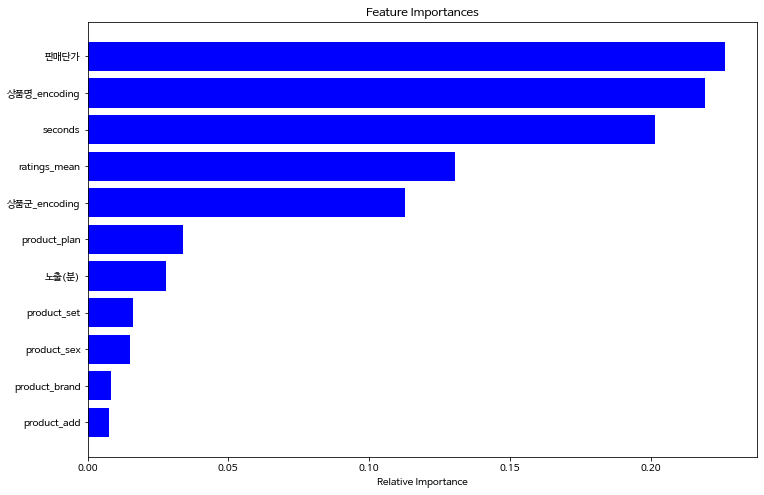

In [92]:
features = ['노출(분)','판매단가','seconds','상품명_encoding','상품군_encoding','ratings_mean',
                 'product_plan', 'product_add', 'product_brand', 'product_set', 'product_sex']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()